## Plots from X-ray absorption calculations using ORCA

In [31]:
import numpy as np
import pandas as pd

In [32]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors
from matplotlib.colors import  ListedColormap
from matplotlib.pyplot import figure

In [33]:
from __future__ import print_function
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

--------------

### Functions list

In [34]:
list_suf = [i for i in range(25,81)] #temporary list asigned in the following two functions

In [35]:
def plot_xray(global_name, list_suf, x_arg, y_arg, label, xlmt=False, xmin=282, xmax=298, \
              scalec=False, ref_list=list_suf, \
              figsize=(16, 10), dpi=80, linestyle='-', marker='o', linewidth=1.3, markersize=1.3):
    """
    Function to plot a customize X-ray spectra (on development)
    global_name is the list of names for the different pd data frame
    list_suf is a list that contains the differentiable part of the global_name
    y_arg arx_arg and e the columns data to plot from pd data frame
    label is a list of labels for each plot
    
    Range of color fading away can be change by changing boleean value in scalec
    and setting ref_list with a list that contains the differentiable part of the
    global_name. if list_suf and ref_list are different, scale of color will be different
    (on revision)
    
    To define a new xrange to plot, it is convenient just to load specific ranges
    from the dataframe in global_name. Then, change xlmt to True and set the values
    as minimun (xmin) and maximum (xmax) in the x-axis of the plot.
    """
    
    #defining scale of colors to use in  the cmap selected   
    if scalec:
        colors=plt.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(ref_list)))
    else:
        colors=plt.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(list_suf)))
        
    fig = plt.figure(figsize=figsize, dpi=dpi)
    n1 = fig.add_subplot(111)
    cc=0
    if xlmt:
        for ii in list_suf:#using xmin and xmax as new range to plot data frames
            n1.plot(x_arg, y_arg, data=newxrange(global_name[cc], x_arg, xmin, xmax), \
                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
                    markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
    else:
        for ii in list_suf:
            n1.plot(x_arg, y_arg, data=global_name[cc], linestyle=linestyle, marker=marker, \
                    linewidth=linewidth, markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
                
    plt.xlabel('Energy (eV)')
    plt.ylabel('Intensity (Oscillator strength)')
    plt.legend(loc='upper left');
    plt.show()

In [36]:
def plot_alot_xray(global_name, list_suf, x_arg, y_arg, xlmt=False, xmin=282, xmax=298, label=None, \
              scalec=False, ref_list=list_suf, plotsvg=False, nameplt='figure.svg',\
              xlbl='Energy (eV)', ylbl='Intensity (Oscillator strength)',\
              figsize=(16, 10), dpi=80, linestyle='-', marker='o', linewidth=1.3, markersize=1.3):
    """
    Function to plot a customize X-ray spectra (on development)
    global_name is the list of names for the different pd data frame
    list_suf is a list that contains the differentiable part of the global_name
    x_arg and y_arg are the columns data to plot from pd data frame
    label is a list of labels for each plot
    
    Range of color fading away can be change by changing boleean value in scalec
    and setting ref_list with a list that contains the differentiable part of the
    global_name. if list_suf and ref_list are different, scale of color will be different
    (on revision)
    
    To define a new xrange to plot, it is convenient just to load specific ranges
    from the dataframe in global_name. Then, change xlmt to True and set the values
    as minimun (xmin) and maximum (xmax) in the x-axis of the plot.
    """
    
    #defining scale of colors to use in  the cmap selected
    if scalec:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(ref_list)))
    else:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(list_suf)))
    if label==None:
        label=[]
        label=['_nolegend_' for ii in list_suf]

    fig = plt.figure(figsize=figsize, dpi=dpi)
    n1 = fig.add_subplot(111)
    cc=0
    if xlmt:
        for ii in list_suf:#using xmin and xmax as new range to plot data frames
            n1.plot(x_arg, y_arg, data=newxrange(global_name[cc], x_arg, xmin, xmax), \
                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
                    markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
    else:
        for ii in list_suf:
            n1.plot(x_arg, y_arg, data=global_name[cc], linestyle=linestyle, marker=marker, \
                    linewidth=linewidth, markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1

    cmap = plt.get_cmap("coolwarm", len(list_suf))
    norm= matplotlib.colors.BoundaryNorm(np.linspace(0.05, 0.85, len(list_suf)),len(list_suf))

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ticks=np.arange(0,len(list_suf)), ax=[n1])

    
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    #plt.legend(loc='upper left');
    plt.show()
    if plotsvg:
        fig.savefig(nameplt, format="svg")

In [37]:
def newxrange(data, col, minl, maxl):
    """
    this function crops a pd data frame
    """
    return data.loc[(data[col]>=minl) & (data[col]<=maxl)]

In [38]:
def getting_max_int(df, min_r, max_r):
    """
    giving a specific range of the data, this function returns the energy when intensity is maximum
    """
    num = df[(df['Energy']<max_r) & (df['Energy']>min_r)]['Intensity'].idxmax()
    try:
        return df.iloc[num][['Energy','Intensity']]
    except IndexError:
        return pd.DataFrame({'Energy': [NaN], 'Intensity': [NaN]})

____________________________________

### X-ray absorption spectra calculated using PNO-DFT/ROCIS zora

#### Pair amino acid interaction between Phenylalanine (F) and Tyrosine (Y)

##### System of study: Phe $---$Tyr (varying inter fragment distances)

### F$---$Y ( $n=2.5, 2.6, ..., 3.0, ..., 11.0 \overset{\circ}{A}$  )

##### Assigning intial variables

In [39]:
#Defining name for variables in the folder (outputs and inputs)
file=""
post=".csv"
suff="fy_"

In [40]:
#Defining variables
l_tmp = [85, 90, 95, 100, 105, 110]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)

In [41]:
list_suf_resume = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,\
                   40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

#### Calling output files

In [42]:
allxas = pd.DataFrame()

In [43]:
for ii in list_suf:
    # Loading data
    globals()['%s' % suff+str(ii)] = pd.read_csv(file+'AB_'+str(ii/10)+'A'+post, delimiter=',')
    globals()['%s' % suff+str(ii)].columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
    
    # collecting just the target columns
    globals()['%s' % suff+str(ii)] = globals()['%s' % suff+str(ii)][['Energy','Intensity']]
    
    # taking an specific range of energy
    globals()['%s' % suff+str(ii)] = \
    newxrange(globals()['%s' % suff+str(ii)], 'Energy', 279, 286)
    
    # Adding a new column (distance) that can distinguish one file from other in a new big pandas
    globals()['%s' % suff+str(ii)].insert(0, 'Distance', ii/10)
    
    # Contatenating all the data
    allxas = pd.concat([allxas, globals()['%s' % suff+str(ii)]], axis=0)

In [44]:
suff_num = 45

,Distance,Energy,Intensity
0,4.5,279.00,0.000351
1,4.5,279.00,0.000553
2,4.5,279.01,0.000582
3,4.5,279.01,0.000612
4,4.5,279.01,0.000644
...,...,...,...
2994,4.5,285.99,0.008037
2995,4.5,285.99,0.007687
2996,4.5,286.00,0.007339
2997,4.5,286.00,0.007019


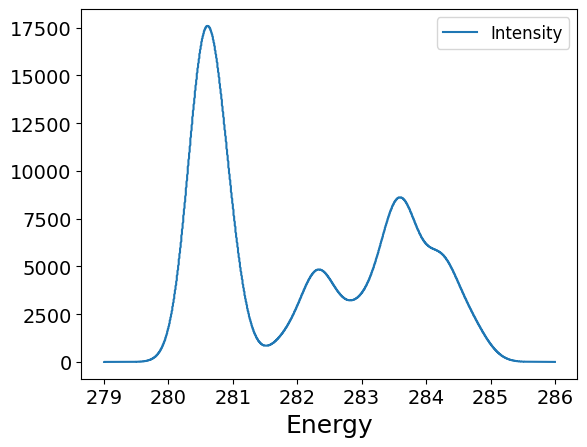

In [45]:
allxas[allxas.Distance == suff_num/10].plot.line(x='Energy', y='Intensity')
globals()['%s' % suff+str(suff_num)]

 _______________________________

# Plotting XAS

In [46]:
# uncomment to check the list or parameters of the plot
#plt.rcParams.keys()

In [47]:
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['font.size'] = 14

In [48]:
distances = list_suf
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(distances)))

In [49]:
figsize=(12, 7.5)
dpi=80

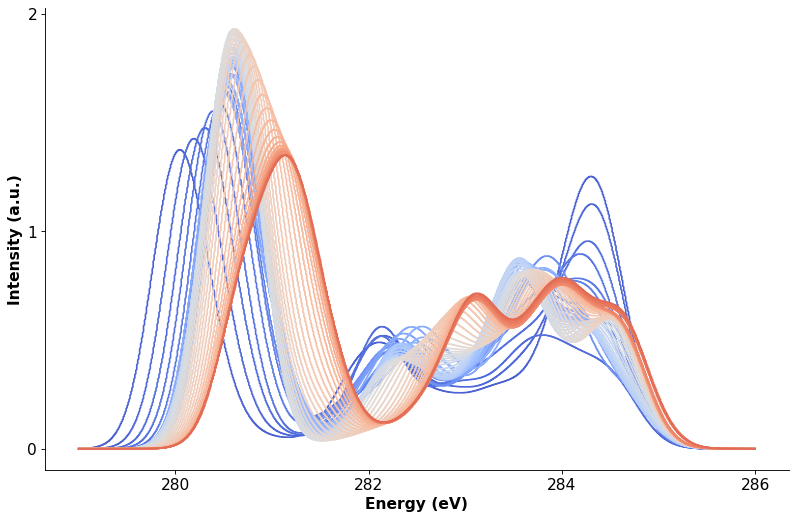

In [62]:
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)

i = 0

for dist in distances:

    # plotting the XAS
    n1.plot('Energy', 'Intensity', data=allxas[allxas.Distance == dist/10], color=colors[i])

    if i == len(distances)-1:
        n1.set_xlabel("Energy (eV)", fontsize=14,fontweight="bold")
        n1.set_ylabel("Intensity (a.u.)", fontsize=14,fontweight="bold")

    # make background transparent
    rect = n1.patch
    rect.set_alpha(0)

    spines = ["top","right"]#,"left","bottom"]
    for s in spines:
        n1.spines[s].set_visible(False)

    n1.set(yticks=([0,10000,20000]))
    n1.set(yticklabels = (['0','1','2']))
    n1.set(xticks=([280,282,284,286]))
    #n1.set(yticklabels = (['0','3','6']))
    #n1.set_yticks([1,3,5,7])
    
    i += 1

plt.show()
fig.savefig('plot_FY_xas_rocisdft.svg', format="svg")

change the functions according to this new way of saving data and presenting plots

adapt some changes to plot_pairaa_xas

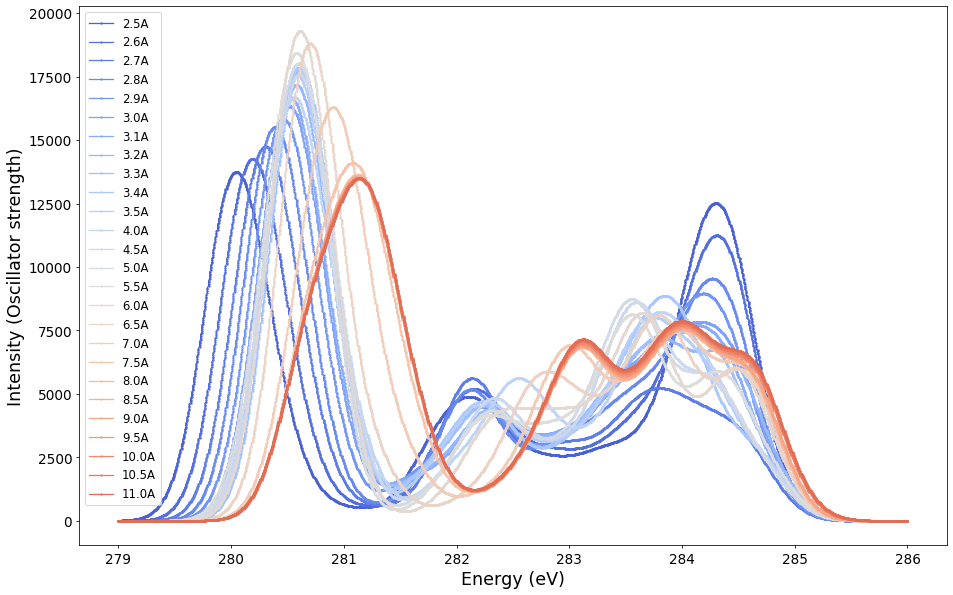

In [54]:
global_name = [globals()['%s' % suff+str(ii)] for ii in list_suf_resume] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_resume] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_resume, 'Energy', 'Intensity', label_name, dpi=70,\
         xlmt=True, xmin=279, xmax=286)

________________________________________

## Variable analysis

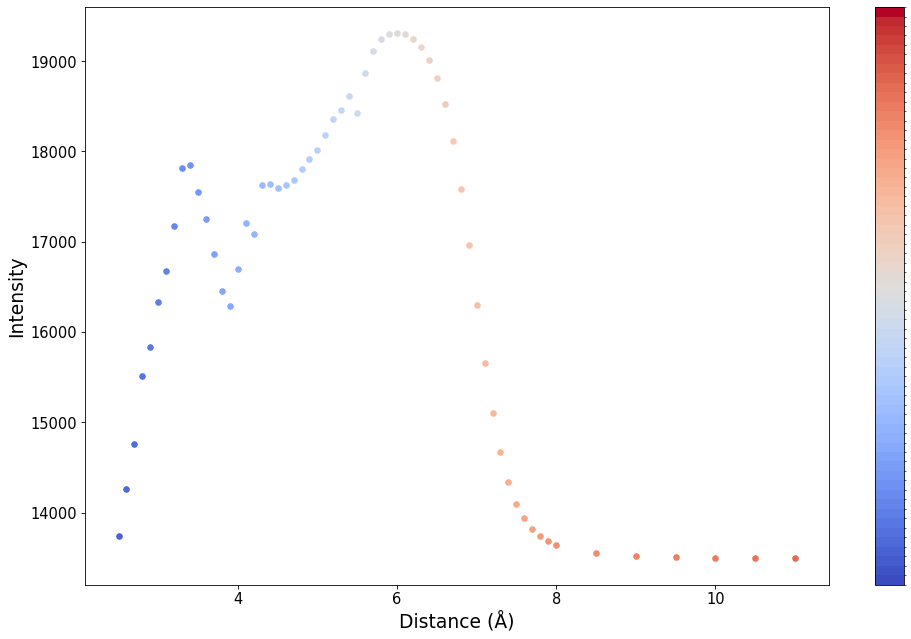

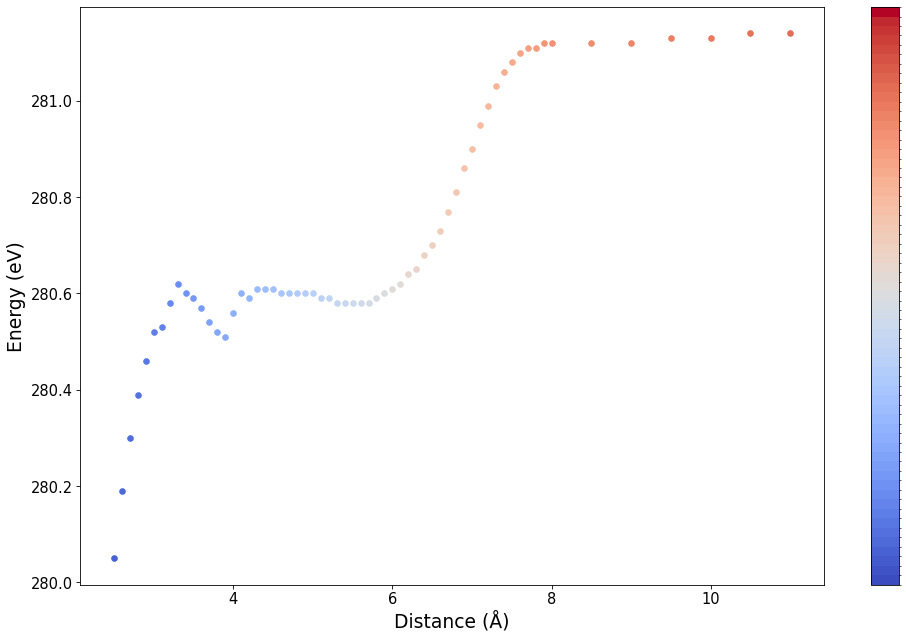

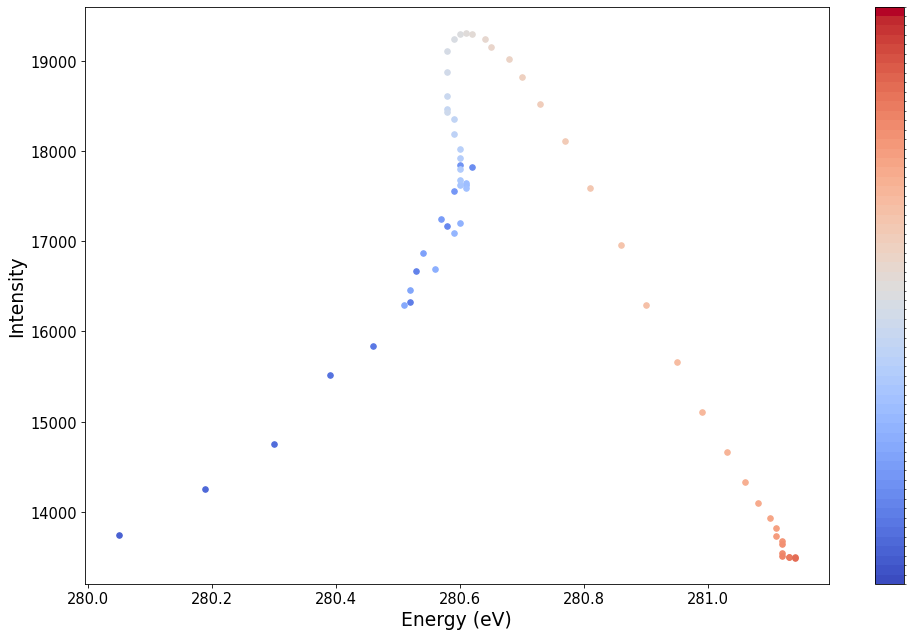

In [30]:
global_name_cut_1 = [getting_max_int(globals()['%s' % suff+str(ii)], 279, 286) \
               for ii in list_suf]
new_df_i = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
  'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
 #'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})
new_df_e = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
 #'Energy': [1/math.exp(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})
#new_df_ei = pd.DataFrame({'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) \
new_df_ei = pd.DataFrame({'Intensity': [global_name_cut_1[cc]['Intensity'] \
                                        for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})

neww_df_i = [new_df_i.iloc[ii] for ii in range(len(list_suf))]
neww_df_e = [new_df_e.iloc[ii] for ii in range(len(list_suf))]
neww_df_ei = [new_df_ei.iloc[ii] for ii in range(len(list_suf))]

label_name = [str(ii/10)+'A' for ii in list_suf]

plot_alot_xray(neww_df_i, list_suf, 'Distance', 'Intensity', dpi=75, markersize=5.3,\
              xlbl='Distance (Å)', ylbl='Intensity') #nameplt='Ivsdist_predge_region1pt.svg')
plot_alot_xray(neww_df_e, list_suf, 'Distance', 'Energy', dpi=75, markersize=5.3,\
              xlbl='Distance (Å)', ylbl='Energy (eV)')
plot_alot_xray(neww_df_ei, list_suf, 'Energy', 'Intensity', dpi=75, markersize=5.3,\
              xlbl='Energy (eV)', ylbl='Intensity')